In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("bank.csv")

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [7]:
df.shape

(11162, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Data Cleaning

In [10]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [13]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

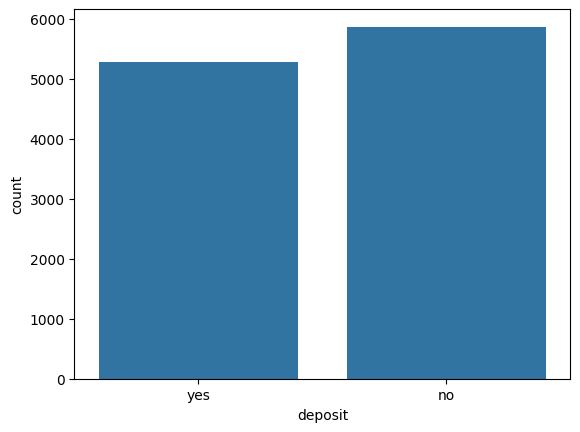

In [14]:
sns.countplot(x='deposit', data=df)
plt.show()

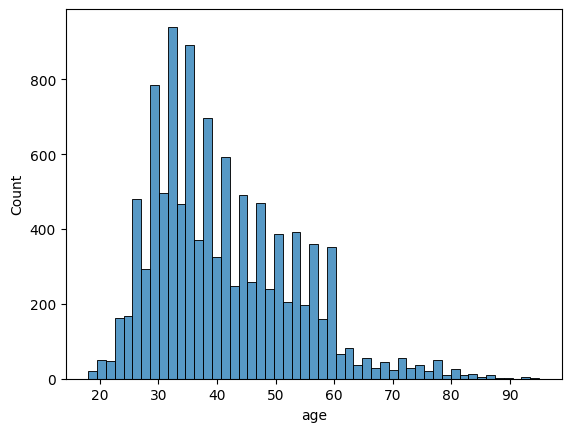

In [15]:
sns.histplot(df['age'])
plt.show()

In [16]:
def age_group(age):
    if age <= 30:
        return 'Young'
    elif age <= 50:
        return 'Adult'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(age_group)


EDA

In [17]:
#What is the average age of the clients?
df['age'].mean()


np.float64(41.231947679627304)

In [18]:
#Which job category appears most frequently?
df['job'].value_counts()


job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [19]:
#Which job category has the highest subscription rate?
df.groupby('job')['age_group'].value_counts().sort_values(ascending=False).head()


job          age_group
management   Adult        1703
blue-collar  Adult        1309
technician   Adult        1240
admin.       Adult         856
retired      Senior        756
Name: count, dtype: int64

In [20]:
#Which job category is most common?
df['job'].value_counts()


job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [21]:
#Which job category has the highest deposit rate?
df.groupby('job')['deposit'].value_counts()


job            deposit
admin.         no          703
               yes         631
blue-collar    no         1236
               yes         708
entrepreneur   no          205
               yes         123
housemaid      no          165
               yes         109
management     yes        1301
               no         1265
retired        yes         516
               no          262
self-employed  no          218
               yes         187
services       no          554
               yes         369
student        yes         269
               no           91
technician     no          983
               yes         840
unemployed     yes         202
               no          155
unknown        no           36
               yes          34
Name: count, dtype: int64

In [22]:
#Does marital status affect deposit?
df.groupby('marital')['deposit'].value_counts()


marital   deposit
divorced  no          671
          yes         622
married   no         3596
          yes        2755
single    yes        1912
          no         1606
Name: count, dtype: int64

In [23]:
#Does deposit increase with age?
df.groupby('age_group')['deposit'].value_counts()


age_group  deposit
Adult      no         3853
           yes        2831
Senior     yes        1313
           no         1158
Young      yes        1145
           no          862
Name: count, dtype: int64

In [24]:
#Are young professionals better than young blue-collar workers?
df[(df['age_group']=='Young')].groupby('job')['deposit'].value_counts()


job            deposit
admin.         yes        143
               no         126
blue-collar    no         189
               yes        160
entrepreneur   yes         12
               no           7
housemaid      yes          8
               no           5
management     yes        234
               no         152
self-employed  yes         52
               no          34
services       no         106
               yes         92
student        yes        235
               no          70
technician     yes        169
               no         148
unemployed     yes         36
               no          22
unknown        yes          4
               no           3
Name: count, dtype: int64

Outlier

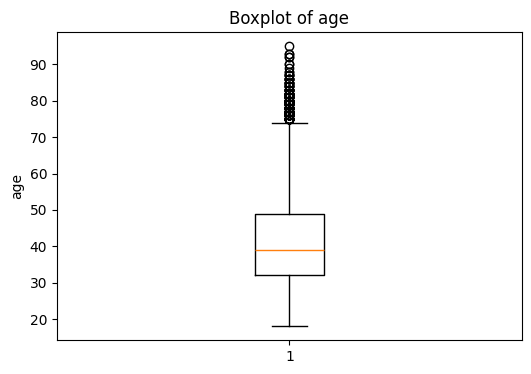

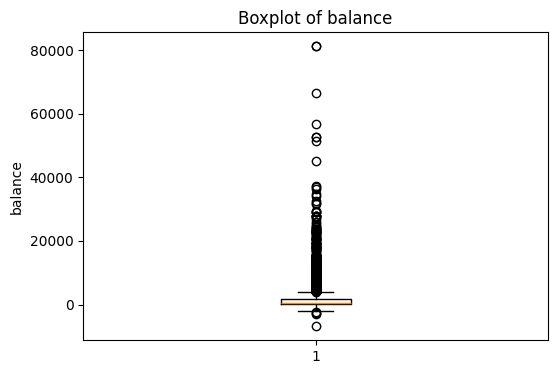

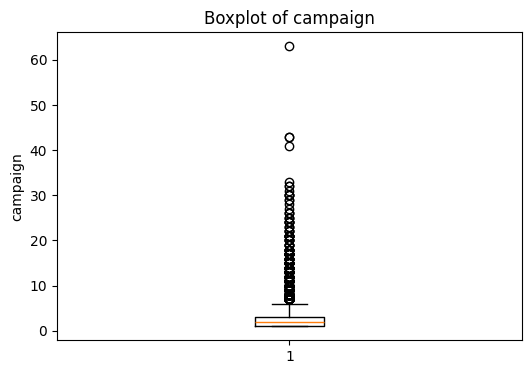

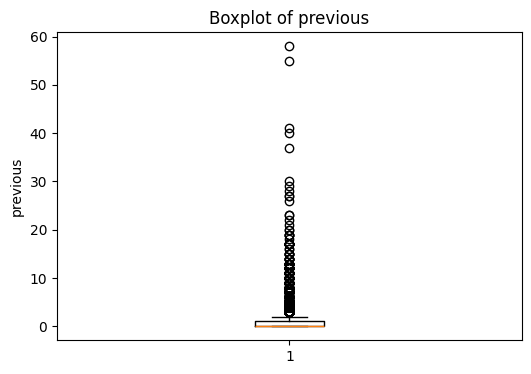

In [25]:
outlier_detect_cols = ['age', 'balance', 'campaign', 'previous']

for col in outlier_detect_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

Feature Engineering

In [26]:
df = df.drop(columns=['duration'])


In [27]:
def balance_group(balance):
    if balance<0:
        return 'Negative'
    if balance >0 and balance <5000:
        return 'Low'
    if balance>5000 and balance<20000:
        return 'Medium'
    else:
        return "High"
df['balance_group']=df['balance'].apply(balance_group)

Encoding

In [28]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,age_group,balance_group
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes,Senior,Low
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes,Senior,Low
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes,Adult,Low
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes,Senior,Low
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes,Senior,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no,Adult,Low
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no,Adult,Low
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no,Adult,Low
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no,Adult,High


In [29]:
onehot_columns=['job','marital','education','default','housing','loan','contact','month','poutcome','age_group','balance_group']

In [30]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(drop='first',sparse_output=False)
onehot.fit(df[onehot_columns])

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [31]:
df=pd.get_dummies(df,columns=onehot_columns,drop_first=True,dtype=int)

In [32]:
x=df.drop(columns='deposit')
y=df['deposit']

In [33]:
y = y.map({'yes': 1, 'no': 0})


In [34]:
y.value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

Data Splitting

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


Data Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


Sampling

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={1:4707},random_state=42)
x_sampled, y_sampled = smote.fit_resample(x_train_scaled, y_train)

In [38]:
pd.Series(y_sampled).value_counts()

deposit
1    4707
0    4707
Name: count, dtype: int64

Model Selection

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1166
           1       0.74      0.64      0.69      1067

    accuracy                           0.72      2233
   macro avg       0.72      0.72      0.72      2233
weighted avg       0.72      0.72      0.72      2233



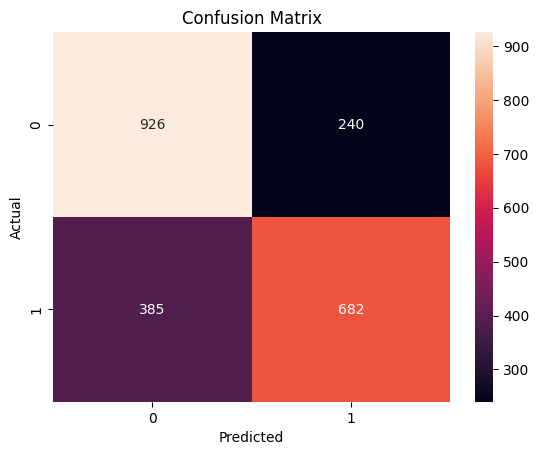

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1166
           1       0.63      0.62      0.62      1067

    accuracy                           0.64      2233
   macro avg       0.64      0.64      0.64      2233
weighted avg       0.64      0.64      0.64      2233



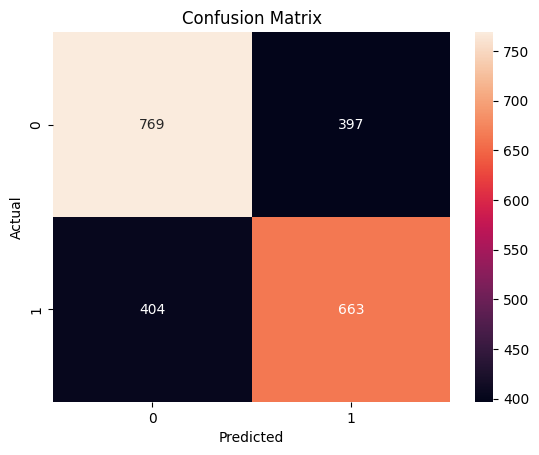

SVC()
              precision    recall  f1-score   support

           0       0.70      0.86      0.77      1166
           1       0.79      0.60      0.68      1067

    accuracy                           0.73      2233
   macro avg       0.74      0.73      0.72      2233
weighted avg       0.74      0.73      0.73      2233



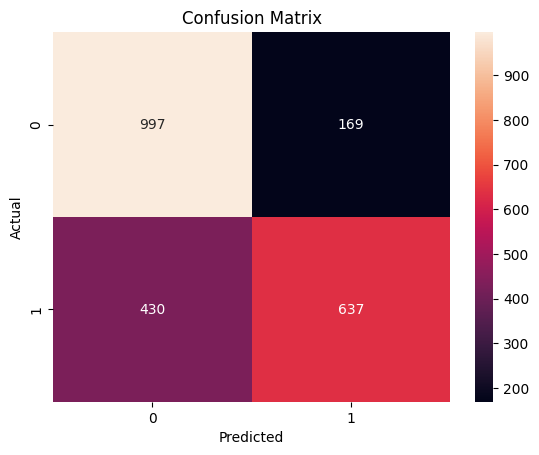

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1166
           1       0.68      0.62      0.65      1067

    accuracy                           0.68      2233
   macro avg       0.68      0.68      0.68      2233
weighted avg       0.68      0.68      0.68      2233



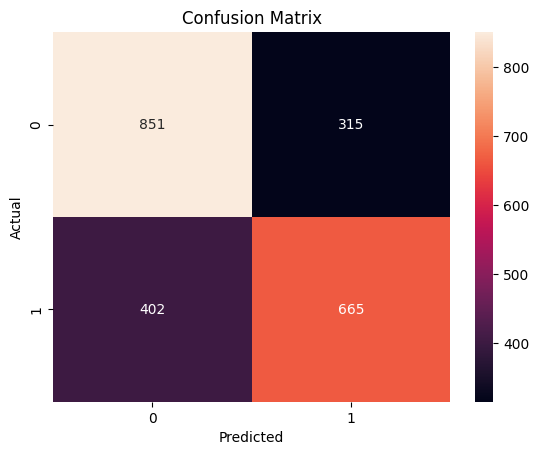

In [40]:
models=[RandomForestClassifier(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier()]
for model in models:
    print(str(model))
    model.fit(x_sampled,y_sampled)
    y_pred=model.predict(x_test_scaled)
    print(classification_report(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [41]:
final_model=RandomForestClassifier()
final_model.fit(x_sampled,y_sampled)
y_pred=model.predict(x_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1166
           1       0.68      0.62      0.65      1067

    accuracy                           0.68      2233
   macro avg       0.68      0.68      0.68      2233
weighted avg       0.68      0.68      0.68      2233



In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(),x,y,cv=5).mean().round(2)

np.float64(0.68)

In [43]:
data={'model':final_model,'onehot':onehot,'scaler':scaler}
import pickle
with open("bank.pkl",'wb') as obj1:
    pickle.dump(data,obj1)